# understanding AUC and ROC on Model Evaluation 

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

#### generate two class dataset


In [4]:
X,y = make_classification(n_samples=1000,n_classes=2,n_features=20,
                         random_state= 20)



X_train,X_test, y_train, y_test= train_test_split(X,y, test_size= 0.3,
                                                 random_state= 27)

#### performing the dataset modeling

In [8]:
from sklearn.linear_model  import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
## logistic Regression 
model1= LogisticRegression()

model2= KNeighborsClassifier(n_neighbors= 4)

model3= DecisionTreeClassifier()

#### fit the model

In [14]:
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

#### predict the probability 


In [15]:
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

### ROC SCORE

Sklearn has a very potent method roc_curve() which computes the ROC for your classifier in a matter of seconds! It returns the FPR, TPR, and threshold values:



In [32]:

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

#### plotting the ROC SCORE

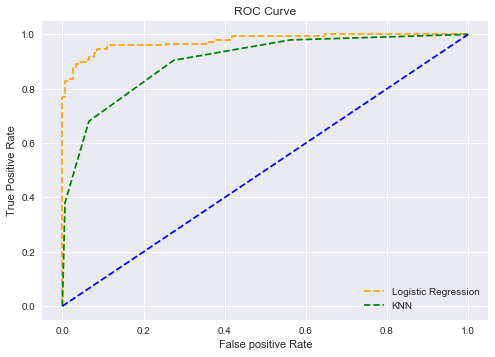

In [37]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn')

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr,p_tpr, linestyle= '--', color='blue',)
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.title('ROC Curve')

plt.show()

### AUC SCORE

The AUC score can be computed using the roc_auc_score() method of sklearn:

In [18]:
from sklearn.metrics import roc_auc_score



auc_score1 = roc_auc_score(y_test,pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test,pred_prob2[:,1])

print(auc_score1, auc_score2)

0.9758570094704548 0.9026054866391001


## Multiclass Classification 

In [39]:
from sklearn.multiclass import OneVsRestClassifier 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve

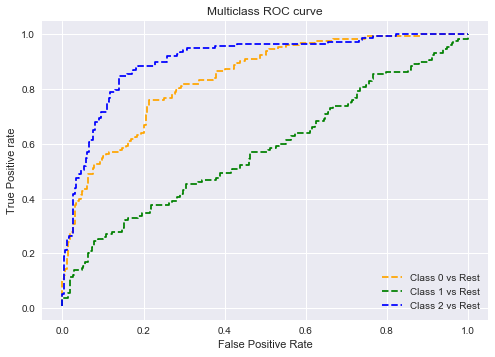

In [40]:


# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=3, n_features=20, n_informative=3, random_state=42)

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# fit model
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  